### The reviews files only have been uploaded with their domain names

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
import nltk
import os
import re
import sklearn
import pandas as pd
import numpy as np

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,confusion_matrix

In [ ]:
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Data Preprocessing

In [ ]:
def preprocess(sentence):
    sentence = re.sub('[^\w\s]',' ',str(sentence))
    sentence = re.sub('[^a-zA-Z]',' ',str(sentence))
    new_sent = " "
    tok = word_tokenize(sentence)
    for i in range(len(tok)):
        if tok[i].lower() not in stopword:
            new_sent+=tok[i].lower()+" "
    return new_sent

In [ ]:
stopword = stopwords.words('english')

In [ ]:
import os
import re
import numpy as np 
import pandas as pd 


def extract_files(pos_file,neg_file,num):
	
	with open(pos_file,'r',encoding='utf-8') as f:
		pos = f.readlines()
	with open(neg_file,'r',encoding='utf-8') as f:
		neg = f.readlines()


	corpus_pos = []
	flag = False

	for i in range(len(pos)):
		if(pos[i]=="<review_text>\n"):
			flag = True
			new_str = " "
			continue
		elif(pos[i]=="</review_text>\n"):
			flag = False
			corpus_pos.append(new_str)
			continue
		if(flag):
			if(len(pos[i])>1):
				sent = pos[i]
				sent = sent[0:len(sent)-1]
				if(sent[0]=='\t'):
					sent = sent[1:len(sent)-1]
			new_str+=sent  
	
	corpus_neg = []
	flag = False

	for i in range(len(neg)):
		if(neg[i]=="<review_text>\n"):
			flag = True
			new_str = " "
			continue
		elif(neg[i]=="</review_text>\n"):
			flag = False
			corpus_neg.append(new_str)
			continue
		if(flag):
			if(len(neg[i])>1):
				sent = neg[i]
				sent = sent[0:len(sent)-1]
				if(sent[0]=='\t'):
					sent = sent[1:len(sent)-1]
			new_str+=sent



	dir_to_write =["Books","Dvd","Electronics","Kitchen"]

	POS_file = dir_to_write[num]+"_pos.txt"
	NEG_file = dir_to_write[num]+"_neg.txt"
	
	with open(POS_file,'w',encoding='utf-8') as f:
		for i in range(len(corpus_pos)):
			f.write(corpus_pos[i])
			f.write("\n")

	with open(NEG_file,'w',encoding='utf-8') as f:
		for i in range(len(corpus_neg)):
			f.write(corpus_neg[i])
			f.write("\n")



# Book

In [ ]:
extract_files("/content/book_positive.review","/content/book_negative.review",0)

In [ ]:
with open('/content/Books_neg.txt','r',encoding='utf-8') as f:
    book_train_negative = f.readlines()

In [ ]:
book_x_train_negative = []

for i in range(len(book_train_negative)):
    sent = book_train_negative[i]
    sent = sent[0:len(sent)-1]
    book_x_train_negative.append(preprocess(sent))
print(len(book_x_train_negative))

book_y_train_negative = np.zeros(len(book_x_train_negative))
print(len(book_y_train_negative))


1000
1000


In [ ]:
with open('/content/Books_pos.txt','r',encoding='utf-8') as f:
    book_train_positive = f.readlines()

In [ ]:
book_x_train_positive = []

for i in range(len(book_train_positive)):
    sent = book_train_positive[i]
    sent = sent[0:len(sent)-1]
    book_x_train_positive.append(preprocess(sent))
print(len(book_x_train_positive))

book_y_train_positive = np.ones(len(book_x_train_positive))
print(len(book_y_train_positive))

1000
1000


# DVD

In [ ]:
extract_files("/content/DVD_positive.review","/content/DVD_negative.review",1)

In [ ]:
with open('/content/Dvd_neg.txt','r',encoding='utf-8') as f:
    DVD_train_negative = f.readlines()

In [ ]:
DVD_x_train_negative = []


for i in range(len(DVD_train_negative)):
    sent = DVD_train_negative[i]
    sent = sent[0:len(sent)-1]
    DVD_x_train_negative.append(preprocess(sent))
print(len(DVD_x_train_negative))

DVD_y_train_negative = np.zeros(len(DVD_x_train_negative))
print(len(DVD_y_train_negative))



1000
1000


In [ ]:
with open('/content/Dvd_pos.txt','r',encoding='utf-8') as f:
    DVD_train_positive = f.readlines()

In [ ]:
DVD_x_train_positive = []

for i in range(len(DVD_train_positive)):
    sent = DVD_train_positive[i]
    sent = sent[0:len(sent)-1]
    DVD_x_train_positive.append(preprocess(sent))
print(len(DVD_x_train_positive))

DVD_y_train_positive = np.ones(len(DVD_x_train_positive))
print(len(DVD_y_train_positive))


1000
1000


# Electronics

In [ ]:
extract_files("/content/electronics_positive.review","/content/electronics_negative.review",2)

In [ ]:
with open('/content/Electronics_neg.txt','r',encoding='utf-8') as f:
    Electronics_train_negative = f.readlines()

In [ ]:
Electronics_x_train_negative = []


for i in range(len(Electronics_train_negative)):
    sent = Electronics_train_negative[i]
    sent = sent[0:len(sent)-1]
    Electronics_x_train_negative.append(preprocess(sent))
print(len(Electronics_x_train_negative))

Electronics_y_train_negative = np.zeros(len(Electronics_x_train_negative))
print(len(Electronics_y_train_negative))

1000
1000


In [ ]:
with open('/content/Electronics_pos.txt','r',encoding='utf-8') as f:
    Electronics_train_positive = f.readlines()

In [ ]:
Electronics_x_train_positive = []


for i in range(len(Electronics_train_positive)):
    sent = Electronics_train_positive[i]
    sent = sent[0:len(sent)-1]
    Electronics_x_train_positive.append(preprocess(sent))
print(len(Electronics_x_train_positive))

Electronics_y_train_positive = np.ones(len(Electronics_x_train_positive))
print(len(Electronics_y_train_positive))

1000
1000


In [ ]:

Data_x=book_x_train_positive+book_x_train_negative+DVD_x_train_positive+DVD_x_train_negative+Electronics_x_train_positive+Electronics_x_train_negative
Data_y=list(book_y_train_positive)+list(book_y_train_negative)+list(DVD_y_train_positive)+list(DVD_y_train_negative)+ list(Electronics_y_train_positive)+list(Electronics_y_train_negative)

In [ ]:
len(Data_x)

6000

In [ ]:
len(Data_y)

6000

In [ ]:
# import pandas as pd
import pandas as pd


Data = pd.DataFrame(list(zip(Data_x, Data_y)),
               columns =['Data', 'Label'])
Data

,Data,Label
0,sphere michael crichton excellant novel certa...,1.0
1,dr oz accomplished heart surgeon field cardia...,1.0
2,gorgeous artwork comic books contains extraor...,1.0
3,book lovers robicheaux demons seem put rest r...,1.0
4,going short sweet review many others commente...,1.0
...,...,...
5995,really excited affordable speakers reading ra...,0.0
5996,speakers sound great sometimes want crank off...,0.0
5997,agree prior reviewers get retract longer uses,0.0
5998,bought several came fancy blister others cous...,0.0


In [ ]:
shuffled_data = Data.sample(frac=1)

In [ ]:
shuffled_data

,Data,Label
868,comments cev translation rather particular ed...,1.0
3069,big fan frank miller work loved reading graph...,0.0
4917,picked pairs amazon applied ca nylon tape fix...,1.0
49,reading chapter day yr great motivator day ah...,1.0
1812,lets say reading book mafia written john gott...,0.0
...,...,...
5628,received ipod quickly plus horrible would dow...,0.0
4945,bought four far appear work well work compact...,1.0
1856,book written empire future really sure asimov...,0.0
5821,cable thing believe hype monster overpriced p...,0.0


In [ ]:
Train_x_data_shuffled = shuffled_data["Data"]
Train_y_data_shuffled = shuffled_data["Label"]

# test data ---->kitchen

In [ ]:
extract_files("/content/kitchen_positive.review","/content/kitchen_negative.review",3)

In [ ]:
with open('/content/Kitchen_neg.txt','r',encoding='utf-8') as f:
    Kitchen_train_negative = f.readlines()

In [ ]:
Kitchen_x_train_negative = []

for i in range(len(Kitchen_train_negative)):
    sent = Kitchen_train_negative[i]
    sent = sent[0:len(sent)-1]
    Kitchen_x_train_negative.append(preprocess(sent))
print(len(Kitchen_x_train_negative))

Kitchen_y_train_negative = np.zeros(len(Kitchen_x_train_negative))
print(len(Kitchen_y_train_negative))

1000
1000


In [ ]:
with open('/content/Kitchen_pos.txt','r',encoding='utf-8') as f:
   Kitchen_train_positive = f.readlines()

In [ ]:
Kitchen_x_train_positive = []

for i in range(len(Kitchen_train_positive)):
    sent = Kitchen_train_positive[i]
    sent = sent[0:len(sent)-1]
    Kitchen_x_train_positive.append(preprocess(sent))
print(len(Kitchen_x_train_positive))

Kitchen_y_train_positive = np.ones(len(Kitchen_x_train_positive))
print(len(Kitchen_y_train_positive))

1000
1000


In [ ]:
Kitchen__data = Kitchen_x_train_positive + Kitchen_x_train_negative
Kitchen_data_y=   list(Kitchen_y_train_positive) +list(Kitchen_y_train_negative)

In [ ]:
test = pd.DataFrame(list(zip(Kitchen__data, Kitchen_data_y)),
               columns =['Data', 'Label'])
test

,Data,Label
0,unfamiliar series unfortunate events books de...,1.0
1,absolutely love product neighbor four little ...,1.0
2,purchased units work well us units children b...,1.0
3,always wanted deep fryer finally decided take...,1.0
4,easy use easy clean two major requirements ki...,1.0
...,...,...
1995,thermometer lasted month going permanent hi m...,0.0
1996,bought first vornado years ago best fan ever ...,0.0
1997,money worth makes alot noise small oscillation,0.0
1998,mine broke rd use need say anymore,0.0


In [ ]:
shuffled_test = test.sample(frac=1)

In [ ]:
Test_x_data_shuffled = shuffled_test["Data"]
Test_y_data_shuffled = shuffled_test["Label"]

In [ ]:
len(Test_y_data_shuffled)

2000

# Test using TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(min_df = 2,max_df=0.8,use_idf=True,sublinear_tf=True,stop_words='english')

In [ ]:
train_tf_idf = vectorizer.fit_transform(Train_x_data_shuffled)

In [ ]:
test_tf_idf = vectorizer.transform(Test_x_data_shuffled)

In [ ]:
train_tf_idf.shape

(6000, 18352)

In [ ]:
vectorizer_chi2 = SelectKBest(chi2,k=5000)

In [ ]:
chi_train_tf_idf = vectorizer_chi2.fit_transform(train_tf_idf,Train_y_data_shuffled)

In [ ]:
chi_test_tf_idf = vectorizer_chi2.transform(test_tf_idf)

In [ ]:
len(Kitchen_data_y)

2000

# Logistic Regression

In [ ]:
Logistic_Regression_classifier = LogisticRegression()
Logistic_Regression_classifier.fit(chi_train_tf_idf,Train_y_data_shuffled)
Logistic_Regression_pred = Logistic_Regression_classifier.predict(chi_test_tf_idf)
Logistic_Regression_acc = float((sum(Logistic_Regression_pred==Test_y_data_shuffled))/len(Test_y_data_shuffled))
Logistic_Regression_f1 = f1_score(Logistic_Regression_pred,Test_y_data_shuffled)
Logistic_Regression_cm = confusion_matrix(Logistic_Regression_pred,Test_y_data_shuffled)
print("The accuracy is :",Logistic_Regression_acc)
print("\nThe f1 score is :",Logistic_Regression_f1)
print("\nconfusion matrix is:")
print(Logistic_Regression_cm)

The accuracy is : 0.818

The f1 score is : 0.825

confusion matrix is:
[[778 142]
 [222 858]]


Text(69.0, 0.5, 'Truth')

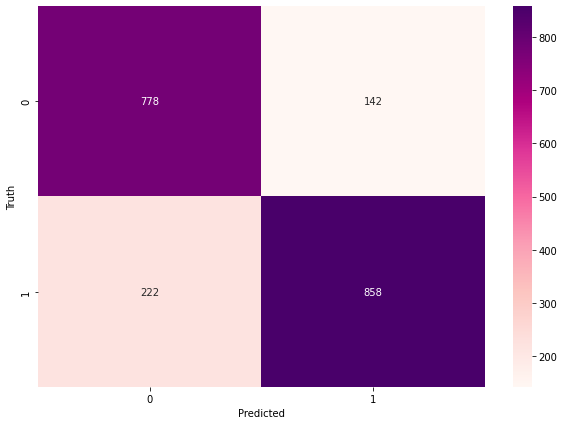

In [ ]:
plt.figure(figsize = (10,7))
sn.heatmap(Logistic_Regression_cm, annot=True, fmt='d',cmap="RdPu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Bagging Classifier with Logistic Regression

In [ ]:

bg_classifier_Logistic_Regression = BaggingClassifier(base_estimator=Logistic_Regression_classifier,n_estimators=7,random_state=0,max_samples=0.5)
bg_classifier_Logistic_Regression.fit(chi_train_tf_idf,Train_y_data_shuffled)
bg_predict_Logistic_Regression = bg_classifier_Logistic_Regression.predict(chi_test_tf_idf)
bg_accuracy_Logistic_Regression = bg_classifier_Logistic_Regression.score(chi_test_tf_idf,Test_y_data_shuffled)
bg_f1 = f1_score(bg_predict_Logistic_Regression,Test_y_data_shuffled)
bg_cm_lr = confusion_matrix(Test_y_data_shuffled,bg_predict_Logistic_Regression)
print("The accuracy is : ",bg_accuracy_Logistic_Regression)
print("\nThe f1 score is :",bg_f1)
print("\nThe confusion matrix is:")
print(bg_cm_lr)

The accuracy is :  0.8115

The f1 score is : 0.8184882041405874

The confusion matrix is:
[[773 227]
 [150 850]]


Text(69.0, 0.5, 'Truth')

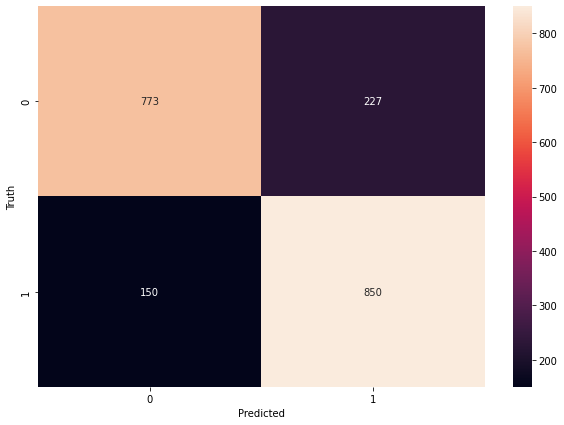

In [ ]:
plt.figure(figsize = (10,7))
sn.heatmap(bg_cm_lr, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## **F score is the highest with Bagging Classifier with Logistic Regression**

# SVM

In [ ]:
rbf_classifier = svm.SVC(gamma=0.9)
rbf_classifier.fit(chi_train_tf_idf,Train_y_data_shuffled)
rbf_pred = rbf_classifier.predict(chi_test_tf_idf)
rbf_accuracy = rbf_classifier.score(chi_test_tf_idf,Test_y_data_shuffled)
rbf_cm = confusion_matrix(rbf_pred,Test_y_data_shuffled)
rbf_f1 = f1_score(rbf_pred,Test_y_data_shuffled)


In [ ]:
colors = sns.diverging_palette(150, 275, as_cmap=True)

The SVM (rbf) Accuracy is:  0.8065
The F1 score is:  0.814031715521384
The confusion matrix is:
[[766 153]
 [234 847]]


Text(69.0, 0.5, 'Truth')

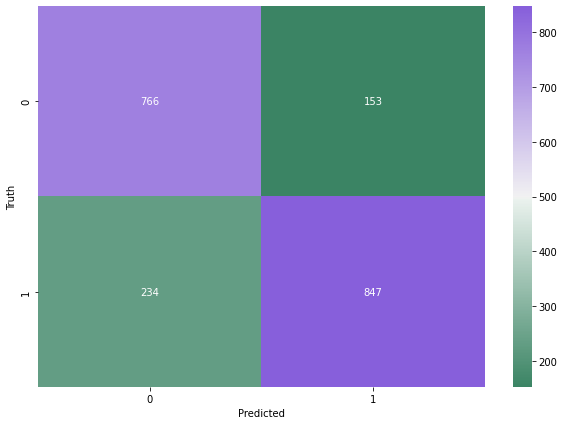

In [ ]:
print("The SVM (rbf) Accuracy is: ",rbf_accuracy)
print("The F1 score is: ",rbf_f1)
print("The confusion matrix is:")
print(rbf_cm)
plt.figure(figsize = (10,7))
sn.heatmap(rbf_cm, annot=True, fmt='d', cmap=colors)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Bagging Classifier SVM with RBF Kernel

In [ ]:

bg_classifier_rbf = BaggingClassifier(base_estimator=rbf_classifier,n_estimators=8,random_state=0,max_samples=0.8)
bg_classifier_rbf.fit(chi_train_tf_idf,Train_y_data_shuffled)
bg_predict_rbf = bg_classifier_rbf.predict(chi_test_tf_idf)
bg_accuracy_rbf = bg_classifier_rbf.score(chi_test_tf_idf,Test_y_data_shuffled)
bg_cm_rbf = confusion_matrix(Test_y_data_shuffled,bg_predict_rbf)
bg_f1_rbf = f1_score(Test_y_data_shuffled,bg_predict_rbf)
print("The accuracy is : ",bg_accuracy_rbf)
print("\nThe F1 score is: ",bg_f1_rbf)
print("\nThe confusion matrix is:")

print(bg_cm_rbf)

The accuracy is :  0.8135

The F1 score is:  0.8172464478196961

The confusion matrix is:
[[793 207]
 [166 834]]


Text(69.0, 0.5, 'Truth')

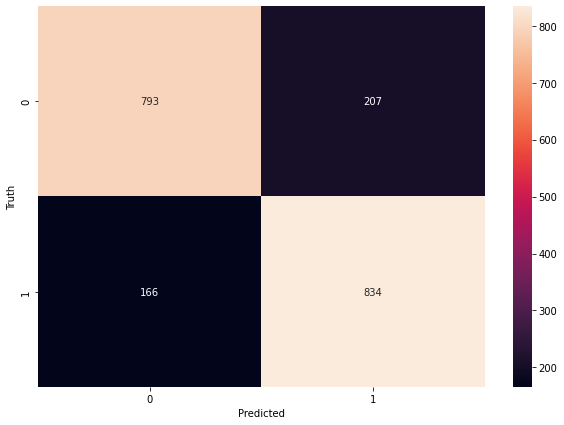

In [ ]:

plt.figure(figsize = (10,7))
sn.heatmap(bg_cm_rbf, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')